In [32]:
import numpy as np
import matplotlib.pyplot as plt
from dynamicalsystems.linearmodel import LinearModel
from DAmethod.kalmanfilter import KalmanFilter, Kalman_gain
%matplotlib inline

In [33]:
dim = 3
M = np.array([[1, 0, 0],[0, 1, 1] ,[0, 0, 1]])
H = np.array([[1, 0, 0], [0, 1, 0]])
Q = np.diag([500**2, 0.005**2, 0.005**2])
R = np.diag([2000**2, 0.03**2])

truth = LinearModel(M, H, Q, 0 * R)
x0 = np.array([40000, 0, np.pi / 150])
t, xx = truth.integrate(0, x0, 50)


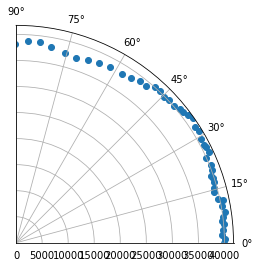

In [34]:
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(xx[1, :], xx[0, :])
ax.set_thetamin(0)
ax.set_thetamax(90)


In [35]:
KF = KalmanFilter(state_dimension=3)
KF.R = R
KF.H = H
KF.M = M
KF.Q = Q
def generate_observation(i):
    return i, xx[: , i]

KF.set_x0(np.array([41000, 0, 0]), Q)


In [36]:
dKF = KF.run(50, generate_observation)

[41000     0     0]
[40888.88888889     0.             0.        ]
[4.07738387e+04 4.91577268e-03 1.35814746e-03]
[4.05687290e+04 1.98276413e-02 4.86311791e-03]
[4.04313231e+04 4.62411295e-02 1.00034048e-02]
[4.03592042e+04 8.11868166e-02 1.55975716e-02]
[4.02341342e+04 1.09975743e-01 1.84504788e-02]
[4.01962895e+04 1.36289830e-01 2.01240355e-02]
[4.02705129e+04 1.61904104e-01 2.12879551e-02]
[4.02532368e+04 1.91826565e-01 2.31210137e-02]
[4.03000492e+04 2.21756660e-01 2.45702667e-02]
[4.01523256e+04 2.41794382e-01 2.36035918e-02]
[3.99367457e+04 2.69987022e-01 2.45834490e-02]
[3.98344294e+04 2.93070385e-01 2.42629934e-02]
[3.98237605e+04 3.19381817e-01 2.47006427e-02]
[3.98002635e+04 3.43554665e-01 2.45878826e-02]
[3.97413541e+04 3.61446255e-01 2.31573464e-02]
[3.98120772e+04 3.82894364e-01 2.27922169e-02]
[3.99099252e+04 4.03863366e-01 2.24027486e-02]
[3.99187091e+04 4.35367340e-01 2.43469016e-02]
[4.01188551e+04 4.62435499e-01 2.49282012e-02]
[4.02533150e+04 4.89504858e-01 2.5385584

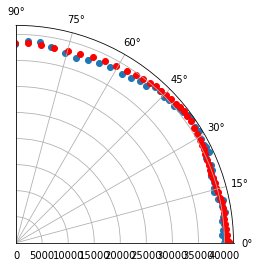

In [37]:
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(xx[1, :], xx[0, :])
xa = np.asarray(dKF["xa"])
xa
kfax = ax.scatter(xa[:, 1], xa[:, 0], c='red')
ax.set_thetamin(0)
ax.set_thetamax(90)
